# Business Understanding

**Problem**
* A small bakery in Korea sells they products through an online platform called 'Bea Min.' According to sales data from July 2019 to June 2020, some products had no sales at all, while others had very few sales. Bakeries want to understand their customers' purchasing habits so that they can implement marketing strategies such as product recommendations to increase the number of product sales through their online platform.

**Goals**
* Make product recommendations and bundling product using association rules to increase the number of product purchases

**Objective**
* Conduct investigations to find associative rules in a product combination.

**Business Metrics**
* Product recommendations

**Dataset Source**
https://www.kaggle.com/hosubjeong/bakery-sales

$\textbf{Tri Umiati}$ <br>
Email : triumi28@gmail.com<br>
Phone : +6285720225575<br>
LinkedIn : www.linkedin.com/in/tri-umiati-149b59194<br>
Github : https://github.com/TriUmiati/TriUmiati
<br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load and Describe Dataset

## Loading and Reading Dataset

In [2]:
df = pd.read_csv('Bakery Sales.csv')
bakery = df.copy()
bakery.head(3)

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

**This dataset contains detailed information about every item shipped to customers between July 2019 and June 2020. There are 2654 rows and 27 columns in this dataset.**

## Check Null and Missing Value 

In [4]:
data_missing_value = bakery.isnull().sum().reset_index()
data_missing_value.columns = ['Feature', 'Missing Value']
data_missing_value['Percentage'] = round((data_missing_value['Missing Value']/len(bakery))*100,2)
data_missing_value = data_missing_value.sort_values('Percentage', ascending=False).reset_index(drop=True)
data_missing_value

,Feature,Missing Value,Percentage
0,croque monsieur,2654,100.00
1,mad garlic,2654,100.00
2,tiramisu,2647,99.74
3,lemon ade,2619,98.68
4,merinque cookies,2607,98.23
5,berry ade,2600,97.97
6,cheese cake,2564,96.61
7,milk tea,2517,94.84
8,caffe latte,2461,92.73
9,gateau chocolat,2458,92.61


In [5]:
col_missing_value = data_missing_value['Feature'].tolist()
bakery[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   croque monsieur     0 non-null      float64
 1   mad garlic          0 non-null      float64
 2   tiramisu            7 non-null      float64
 3   lemon ade           35 non-null     float64
 4   merinque cookies    47 non-null     float64
 5   berry ade           54 non-null     float64
 6   cheese cake         90 non-null     float64
 7   milk tea            137 non-null    float64
 8   caffe latte         193 non-null    float64
 9   gateau chocolat     196 non-null    float64
 10  almond croissant    202 non-null    float64
 11  vanila latte        209 non-null    float64
 12  jam                 220 non-null    float64
 13  cacao deep          323 non-null    float64
 14  pandoro             343 non-null    float64
 15  wiener              355 non-null    float64
 16  americ

[Text(0, 0, 'croque monsieur'),
 Text(1, 0, 'mad garlic'),
 Text(2, 0, 'tiramisu'),
 Text(3, 0, 'lemon ade'),
 Text(4, 0, 'merinque cookies'),
 Text(5, 0, 'berry ade'),
 Text(6, 0, 'cheese cake'),
 Text(7, 0, 'milk tea'),
 Text(8, 0, 'caffe latte'),
 Text(9, 0, 'gateau chocolat'),
 Text(10, 0, 'almond croissant'),
 Text(11, 0, 'vanila latte'),
 Text(12, 0, 'jam'),
 Text(13, 0, 'cacao deep'),
 Text(14, 0, 'pandoro'),
 Text(15, 0, 'wiener'),
 Text(16, 0, 'americano'),
 Text(17, 0, 'orange pound'),
 Text(18, 0, 'pain au chocolat'),
 Text(19, 0, 'croissant'),
 Text(20, 0, 'tiramisu croissant'),
 Text(21, 0, 'plain bread'),
 Text(22, 0, 'angbutter'),
 Text(23, 0, 'place'),
 Text(24, 0, 'day of week'),
 Text(25, 0, 'total'),
 Text(26, 0, 'datetime')]

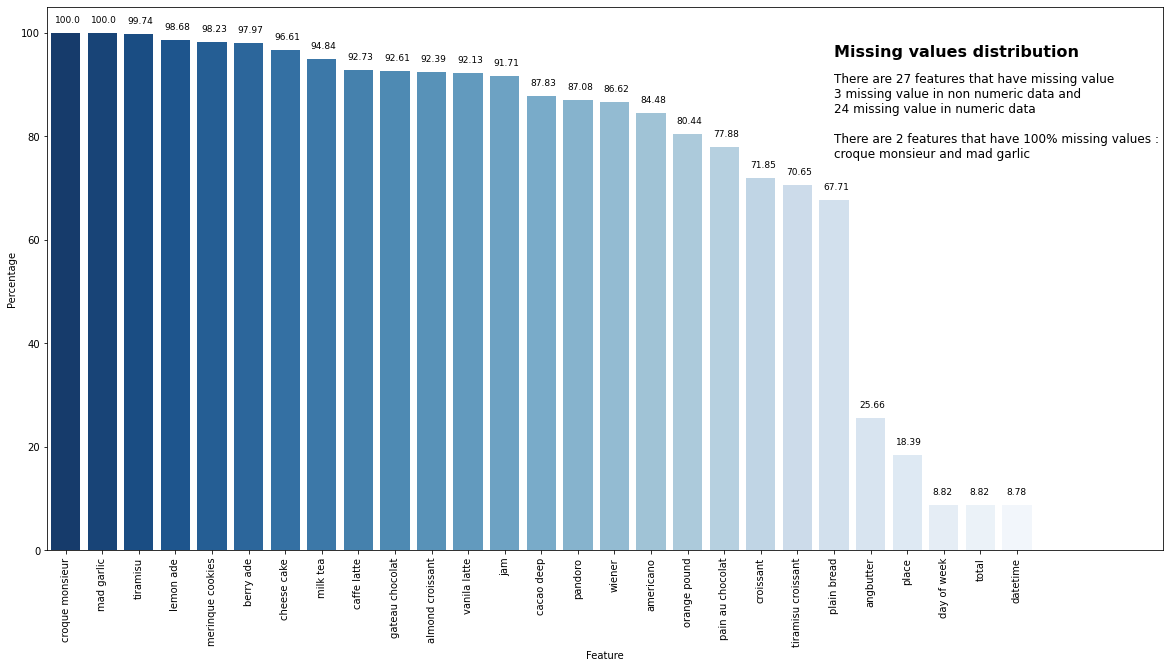

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.barplot(x = 'Feature', y='Percentage',data=data_missing_value,ax=ax, 
               palette='Blues_r')

x = np.arange(len(data_missing_value['Feature']))
y = data_missing_value['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+2, str(v), fontsize = 9, color='black')
    
title = '''
Missing values distribution
'''
ax.text(21,92,title,horizontalalignment='left',color='black',fontsize= 16,fontweight='bold')
    

text = '''
There are 27 features that have missing value
3 missing value in non numeric data and
24 missing value in numeric data

There are 2 features that have 100% missing values :
croque monsieur and mad garlic

'''
ax.text(21,70,text,horizontalalignment='left',color='black',fontsize=12,fontweight='normal')
    
ax.set_ylim(0,105)

ax.set_xlim(-0.5,30)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Data Cleaning and Feature Engineering

## Remove unuseful columns and rows

**a. Remove column `place`** 

In [7]:
bakery = bakery.drop('place', axis=1)

**b. Remove columns with zero delivery (100% missing value)**

In [8]:
bakery = bakery.drop(['croque monsieur', 'mad garlic'], axis=1)

**c. Remove rows without sales or date information**

In [9]:
missing_rows = bakery[bakery[['datetime','day of week', 'total']].isna().any(axis=1)].index
bakery = bakery.drop(missing_rows, axis = 0).reset_index(drop=True)

## Filling missing value

In [10]:
bakery = bakery.fillna(0)

## Create new feature

Create a new feature from the `daypart` feature. This new feature includes the transformation of time from hours to parts of the day (dawn, morning, afternoon, afternoon, evening, and midnight). This new feature will be used to get business insights from product sales.

In [11]:
bakery.datetime = pd.to_datetime(bakery['datetime'])
day_part = bakery.datetime.dt.hour
def daypart(hour):
    if hour in [2,3,4,5]:
        return 'dawn'
    elif hour in [6,7,8,9]:
        return 'morning'
    elif hour in [10,11,12,13]:
        return 'noon'
    elif hour in [14,15,16,17]:
        return 'afternoon'
    elif hour in [18,19,20,21]:
        return 'evening'
    else:
        return 'midnight'
    
dayparts = day_part.apply(daypart)
bakery['dayparts'] = dayparts

# Data Exploration

## Frequent item and best sellers

In [12]:
Items = bakery.drop(columns = ['datetime','day of week','total','dayparts'], axis=1)
total_item = Items.sum().reset_index()
total_item.columns = ['Item','Total item']
total_item = total_item.sort_values('Total item', ascending=False)
total_item['Total item'] = total_item['Total item'].astype('int64')
total_item

,Item,Total item
0,angbutter,3229
4,croissant,1049
1,plain bread,1028
6,tiramisu croissant,945
8,pain au chocolat,726
15,orange pound,566
3,americano,513
16,wiener,476
12,pandoro,394
7,cacao deep,364


[Text(0, 0, 'angbutter'),
 Text(1, 0, 'croissant'),
 Text(2, 0, 'plain bread'),
 Text(3, 0, 'tiramisu croissant'),
 Text(4, 0, 'pain au chocolat'),
 Text(5, 0, 'orange pound'),
 Text(6, 0, 'americano'),
 Text(7, 0, 'wiener'),
 Text(8, 0, 'pandoro'),
 Text(9, 0, 'cacao deep'),
 Text(10, 0, 'jam'),
 Text(11, 0, 'vanila latte'),
 Text(12, 0, 'almond croissant'),
 Text(13, 0, 'caffe latte'),
 Text(14, 0, 'gateau chocolat'),
 Text(15, 0, 'milk tea'),
 Text(16, 0, 'cheese cake'),
 Text(17, 0, 'berry ade'),
 Text(18, 0, 'merinque cookies'),
 Text(19, 0, 'lemon ade'),
 Text(20, 0, 'tiramisu')]

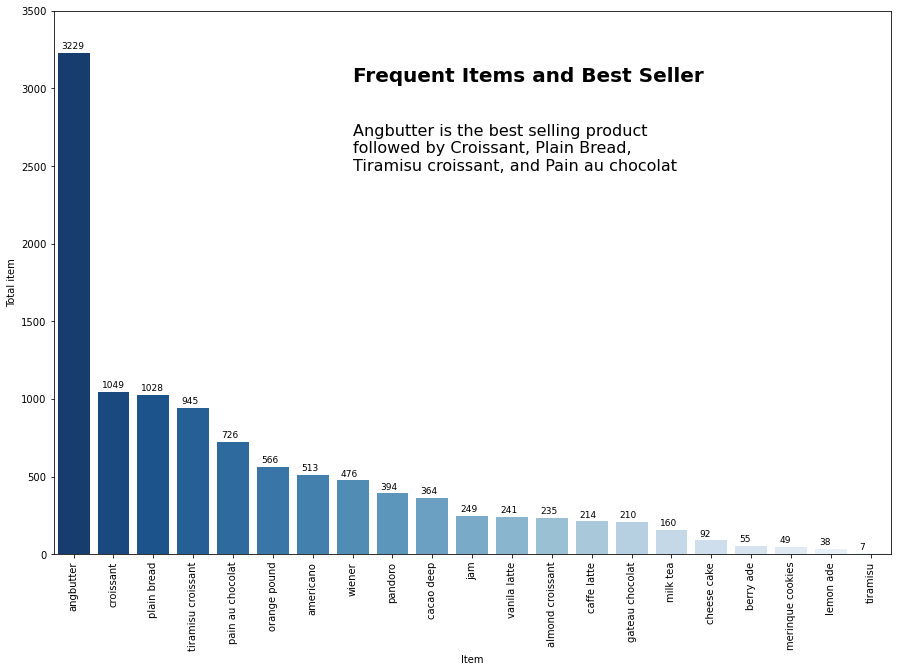

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = sns.barplot(y='Total item', x='Item', data=total_item.sort_values('Total item', ascending=False), palette='Blues_r')

x = np.arange(len(total_item['Item']))
y = total_item['Total item']

for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+25, str(v), fontsize = 9, color='black')
    
title = '''
Frequent Items and Best Seller
'''
ax.text(7,2900,title,horizontalalignment='left',color='black',fontsize= 20,fontweight='bold')
    

text = '''
Angbutter is the best selling product 
followed by Croissant, Plain Bread, 
Tiramisu croissant, and Pain au chocolat

'''
ax.text(7,2250,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,3500)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Peak hours of sales

In [14]:
peakhours = bakery.groupby('dayparts')['datetime'].size().reset_index()
peakhours.columns = ['Daypart','Total Delivery']
peakhours = peakhours.sort_values('Total Delivery', ascending=False)
peakhours

,Daypart,Total Delivery
2,noon,1704
0,afternoon,714
1,midnight,2


In [15]:
peakhours = bakery.groupby('dayparts')['datetime'].size().reset_index()
peakhours.columns = ['Daypart','Total Delivery']
peakhours['Percentage'] = round((peakhours['Total Delivery']/(peakhours['Total Delivery'].sum()))*100,2)
peakhours = peakhours.sort_values('Percentage', ascending=False).reset_index(drop=True)
peakhours

,Daypart,Total Delivery,Percentage
0,noon,1704,70.41
1,afternoon,714,29.50
2,midnight,2,0.08


[Text(0, 0, 'noon'), Text(1, 0, 'afternoon'), Text(2, 0, 'midnight')]

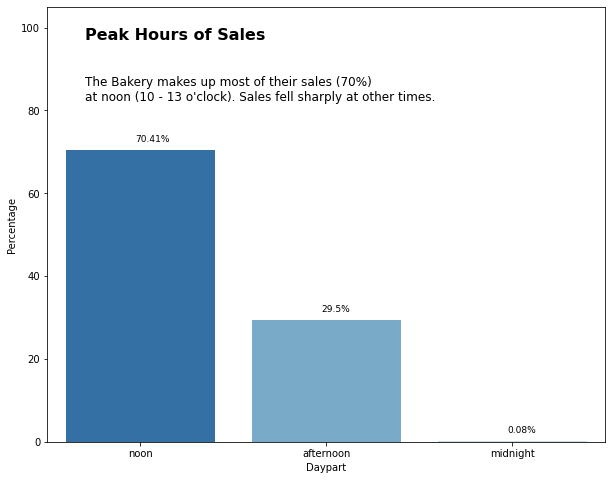

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.barplot(x='Daypart', y='Percentage', data=peakhours, palette='Blues_r')

x = np.arange(len(peakhours['Daypart']))
y = peakhours['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.025, v+2, str(v)+'%', fontsize = 9, color='black')
    
title = '''
Peak Hours of Sales
'''
ax.text(-0.3,93,title,horizontalalignment='left',color='black',fontsize= 16,fontweight='bold')
    

text = '''

The Bakery makes up most of their sales (70%)
at noon (10 - 13 o'clock). Sales fell sharply at other times.

'''
ax.text(-0.3,75,text,horizontalalignment='left',color='black',fontsize=12,fontweight='normal')
    
ax.set_ylim(0,105)

ax.set_xticklabels(ax.get_xticklabels())

## Most Productive Days

In [17]:
prod_days = bakery.groupby('day of week')['datetime'].size().reset_index()
prod_days.columns = ['Day','Total Delivery']
prod_days = prod_days.sort_values('Total Delivery', ascending=False)
prod_days

,Day,Total Delivery
3,Sun,554
2,Sat,452
4,Thur,385
6,Wed,360
0,Fri,334
1,Mon,332
5,Tues,3


[Text(0, 0, 'Sun'),
 Text(1, 0, 'Sat'),
 Text(2, 0, 'Thur'),
 Text(3, 0, 'Wed'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Mon'),
 Text(6, 0, 'Tues')]

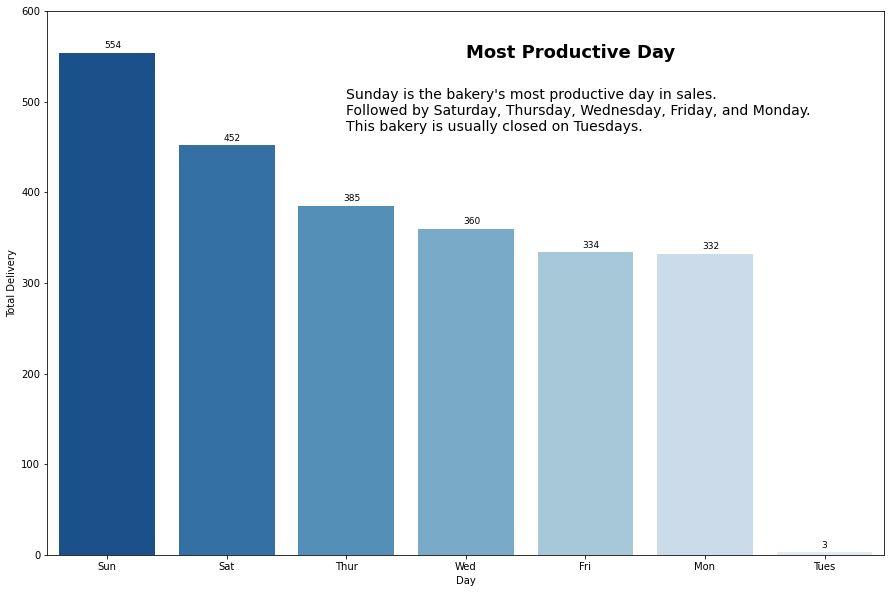

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = sns.barplot(x='Day', y='Total Delivery', data=prod_days, palette='Blues_r')

x = np.arange(len(prod_days['Day']))
y = prod_days['Total Delivery']

for i, v in enumerate(y):
    ax.text(x[i]-0.025, v+5, str(v), fontsize = 9, color='black')
    
title = '''
Most Productive Day
'''
ax.text(3,525,title,horizontalalignment='left',color='black',fontsize= 18,fontweight='bold')
    

text = '''
Sunday is the bakery's most productive day in sales.
Followed by Saturday, Thursday, Wednesday, Friday, and Monday.
This bakery is usually closed on Tuesdays.
'''
ax.text(2,450,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')
    
ax.set_ylim(0,600)

ax.set_xticklabels(ax.get_xticklabels())

# Business Insight

* So far, Angbutter was the best-selling product.
* Because Croque Monsieur and Mad Garlic have never been ordered, the bakery may be able to remove these two items from their product list.
* The majority of sales occur between the hours of 10 a.m. and 13 a.m.
* Sunday is the day with the highest sales, or the most productive selling day.

# Association Rules

Before discussing the association rules, let's dig into the market basket analysis first.<br>

**Market Barket Analysis** is a methodology that investigates purchasing behavior by analyzing the items in the buyer's shopping cart. The investigation is carried out by determining which products are selling well. What products are purchased together? The investigation's findings are then used to develop cross-selling and upselling strategies, which are expected to encourage buyers to purchase multiple products and increase purchase transactions. <br>

This market basket analysis method has many advantages:
* Because it is only a "if-then" pattern, it is clear and simple to understand. For example, if product A is purchased, product B is then purchased too. 
* Because it can process many variables, it can process transactions without losing information. 
* Since it does not rely on user data, the results of this method are applicable to new users. <br>

However, this method also has disadvantages:
* The problem's complexity grows dramatically as the number of products available increases. 
* The problem is dependent on transaction data, which means that new or rare products won't get insights right away.<br>

The following question is, "How do we investigate this purchasing behavior?" The solution is to use **Apriori**. What exactly is apriori? The term apriori refers to an algorithm or technique for determining the relationship between items or products in a shopping cart. This a priori result is known as the **Association Rule**.<br>

This association rule is usually expressed in the form:<br>
{A} -> {B} <br>
A as **antecedent** (if) and B as **consequent** (then)<br>

For example: <br>
{eggs} -> {milk} <br>

This means that if the customer buys eggs, then the customer also tends to buy milk. <br>

Within the association rules there are several important metrics: <br>
* **Support**. Support is an indication of how often the itemset appears in the dataset. In other words, an indication is how often items X and Y appear in the dataset.
* **Confidence**. Confidence is an indication of how often the rule proves to be true. That is an indication of how often items X and Y appear together, keeping in mind the number of times X occurs.
* **Lift**. The following ratio of support observations can be said to explain the strength of the emergence of a rule X and Y. <br>

In [19]:
data = bakery.reset_index(inplace = True)
data = bakery.drop(columns = ['datetime','day of week','total','dayparts','index'], axis=1)
data = data >= 1
data.head()

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


This frequent itemset step searches the dataset for item combinations that meet the minimum requirements of the support value. If the itemset combination does not meet the minimum support requirements, it will be deleted automatically. The minimum support limit in this case is 0.05, or 5%.

In [20]:
# Frequent Itemset step
frequentItems = apriori(data, use_colnames=True, min_support=0.05)
frequentItems.sort_values(by = 'support', ascending = False).head()

,support,itemsets
0,0.815289,(angbutter)
1,0.354132,(plain bread)
6,0.321901,(tiramisu croissant)
4,0.308678,(croissant)
16,0.267769,"(angbutter, plain bread)"


After calculating the frequent itemset, the next step is to apply the rules. The antecedent and consequent will be determined at this stage based on the results of the frequent itemset. Then, for each item combination, the Confidence, Support, and Lift values are calculated.

In [21]:
rules = association_rules(frequentItems, metric = 'lift', min_threshold = 1)
rules.sort_values(by = 'lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(jam),(plain bread),0.090909,0.354132,0.079339,0.872727,2.464411,0.047145,5.074675
1,(plain bread),(jam),0.354132,0.090909,0.079339,0.224037,2.464411,0.047145,1.171565
10,"(jam, angbutter)",(plain bread),0.061157,0.354132,0.052893,0.864865,2.442209,0.031235,4.779421
13,(plain bread),"(jam, angbutter)",0.354132,0.061157,0.052893,0.149358,2.442209,0.031235,1.103688
11,"(angbutter, plain bread)",(jam),0.267769,0.090909,0.052893,0.197531,2.172840,0.028550,1.132867
12,(jam),"(angbutter, plain bread)",0.090909,0.267769,0.052893,0.581818,2.172840,0.028550,1.750988
6,(pain au chocolat),(croissant),0.242562,0.308678,0.095868,0.395230,1.280397,0.020994,1.143116
7,(croissant),(pain au chocolat),0.308678,0.242562,0.095868,0.310576,1.280397,0.020994,1.098653
16,(pain au chocolat),"(angbutter, croissant)",0.242562,0.230579,0.067355,0.277683,1.204289,0.011426,1.065213
15,"(angbutter, croissant)",(pain au chocolat),0.230579,0.242562,0.067355,0.292115,1.204289,0.011426,1.070001


In [22]:
rules.to_excel("Association Rules.xlsx", index=False)

# Association Rules Insight

A filter on the results of the association rules is required to get the most potential products that can be made into bundling. In this case, the product with the greatest potential for bundling must have a minimum Lift value of more than 1 and the highest Confidence (the confidence value obtained is 0.8).

In [23]:
insight = rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.8) ]
insight

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(jam),(plain bread),0.090909,0.354132,0.079339,0.872727,2.464411,0.047145,5.074675
10,"(jam, angbutter)",(plain bread),0.061157,0.354132,0.052893,0.864865,2.442209,0.031235,4.779421


In [24]:
insight.to_excel("Association Rules Insight.xlsx", index=False)

# Model Insight

The insights model is derived from the outcomes of association rules. These are some of the most interesting dataset-derived associations.
1. If the jam is purchased, there is an 87 percent chance (confidence) that plain bread will be purchased as well. This rule is significant because it represents for 5% (support) of all existing sales data.
2. If plain bread is purchased, there is a 22 percent chance (confidence) that jam will be purchased as well. This rule is significant because it represents for 5% (support) of all existing sales data.
3. If angbutter and jam are purchased, there is an 86 percent chance (confidence) that plain bread will be purchased as well. This rule is significant because it represents for 5% (support) of all existing sales data.
4. If the jam is bought, there is a 58 percent chance (confidence) that plain bread and angbutter will be bought. This rule is significant because it represents for 5% (support) of all existing sales data.
5. There is a 39 percent chance (confidence) that croissants will be purchased if pain au chocolat is purchased. This rule is significant because it represents for 5% (support) of all existing sales data.
6. If the wiener is bought, there is a 34% possibility (confidence) that the croissant will be bought. This rule is significant because it represents for 5% (support) of all existing sales data.
7. If a croissant is purchased, there is a 36% possibility (confidence) that plain bread will be purchased. This rule is significant because it represents for 5% (support) of all existing sales data.
8. If pain au chocolat is purchased, there is a 35% possibility (confidence) that plain bread will then be purchased. This rule is significant because it represents for 5% (support) of all existing sales data.
9. If an angbutter and a pain au chocolat are purchased, there is a 37% possibility (confidence) that croissants will be purchased. This rule is significant because it represents for 5% (support) of all existing sales data.

# Business Recommendation

Several strategies can be applied by bakeries to increase product sales transactions:
* Provide recommendations on the product detail page (PDP) of the Customs Min platform. Recommendations that can be given are:
1. When customers open PDP jam, then we can recommend plain bread to customers
2. When the customer puts the jam into the “basket”, then we can recommend plain bread to the customer
3. When customers open PDP pain au chocolat, then we can recommend croissants to customers
4. When the customer puts the pain au chocolat into the “basket”, then we can recommend the croissant to the customer
5. When the customer opens the PDP wiener, then we can recommend the croissant to the customer
6. When the customer put the wiener into the “basket”, then we can recommend the croissant to the customer
7. When the customer opens the PDP croissant, then we can recommend plain bread to the customer
8. When the customer puts the croissant into the “basket”, then we can recommend plain bread to the customer
9. When customers open PDP pain au chocolat, then we can recommend plain bread to customers
10. When customers put pain au chocolat into the "basket", then we can recommend plain bread to customers
11. When customers put angbutter and jam into the "basket", then we can recommend plain bread to customers
12. When customers put angbutter and pain au chocolat into the “basket”, then we can recommend croissants to customers

* The most potential products for bundling are:
1. Bundling of two products: Jam - Plain bread
2. Bundling of three products: Angbutter - Jam - Plain bread

Other recommendations:
This recommendation is based on a business insight: Remove Croque monsieur and Mad garlic from the sales platform's product list because the two products are not creating any sales.